In [6]:
import pandas as pd


In [8]:
data = pd.read_csv("large_dirty_dataset.csv")
data

,ID,Name,Age,Date_of_Joining,Salary,Department
0,1,Bob,41,2020-01-08,NaN,IT
1,2,NaN,28,NaN,NaN,Finance
2,3,Diana,39,2021-11-13,84040.0,IT
3,4,Charlie,35,2023-06-09,46211.0,NaN
4,5,Alice,33,2021-03-24,NaN,Sales
...,...,...,...,...,...,...
545,180,Alice,39,2020-01-13,74814.0,NaN
546,13,Diana,34,2021-07-12,56654.0,NaN
547,222,Charlie,43,2020-05-15,34117.0,HR
548,366,Bob,49,NaN,65931.0,Sales


## DATA CLEANING AND PREPROCESSING

In [11]:
data.shape

(550, 6)

In [13]:
data.head()

,ID,Name,Age,Date_of_Joining,Salary,Department
0,1,Bob,41,2020-01-08,NaN,IT
1,2,NaN,28,NaN,NaN,Finance
2,3,Diana,39,2021-11-13,84040.0,IT
3,4,Charlie,35,2023-06-09,46211.0,NaN
4,5,Alice,33,2021-03-24,NaN,Sales


In [15]:
data.columns

Index(['ID', 'Name', 'Age', 'Date_of_Joining', 'Salary', 'Department'], dtype='object')

In [17]:
data.dtypes

ID                   int64
Name                object
Age                 object
Date_of_Joining     object
Salary             float64
Department          object
dtype: object

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               550 non-null    int64  
 1   Name             491 non-null    object 
 2   Age              502 non-null    object 
 3   Date_of_Joining  488 non-null    object 
 4   Salary           439 non-null    float64
 5   Department       497 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 25.9+ KB


In [21]:
data.isnull().sum()

ID                   0
Name                59
Age                 48
Date_of_Joining     62
Salary             111
Department          53
dtype: int64

In [23]:
data.isna().sum()

ID                   0
Name                59
Age                 48
Date_of_Joining     62
Salary             111
Department          53
dtype: int64

In [25]:
data.notna().sum()

ID                 550
Name               491
Age                502
Date_of_Joining    488
Salary             439
Department         497
dtype: int64

In [27]:
data.notnull().sum()

ID                 550
Name               491
Age                502
Date_of_Joining    488
Salary             439
Department         497
dtype: int64

In [29]:
int(data.shape[0]*.50)

275

In [31]:
data = data.dropna(subset=['Name'])
data

,ID,Name,Age,Date_of_Joining,Salary,Department
0,1,Bob,41,2020-01-08,NaN,IT
2,3,Diana,39,2021-11-13,84040.0,IT
3,4,Charlie,35,2023-06-09,46211.0,NaN
4,5,Alice,33,2021-03-24,NaN,Sales
5,6,Alice,NaN,2023-09-14,75968.0,Sales
...,...,...,...,...,...,...
545,180,Alice,39,2020-01-13,74814.0,NaN
546,13,Diana,34,2021-07-12,56654.0,NaN
547,222,Charlie,43,2020-05-15,34117.0,HR
548,366,Bob,49,NaN,65931.0,Sales


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 491 entries, 0 to 549
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               491 non-null    int64  
 1   Name             491 non-null    object 
 2   Age              446 non-null    object 
 3   Date_of_Joining  437 non-null    object 
 4   Salary           390 non-null    float64
 5   Department       448 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 26.9+ KB


In [35]:
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')
median_age = data['Age'].median()
data['Age'] = data['Age'].fillna(median_age)
data['Age'] = data['Age'].astype('int')

C:\Users\dell\AppData\Local\Temp\ipykernel_17348\1423970716.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age'] = pd.to_numeric(data['Age'], errors='coerce')
C:\Users\dell\AppData\Local\Temp\ipykernel_17348\1423970716.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age'] = data['Age'].fillna(median_age)
C:\Users\dell\AppData\Local\Temp\ipykernel_17348\1423970716.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 491 entries, 0 to 549
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               491 non-null    int64  
 1   Name             491 non-null    object 
 2   Age              491 non-null    int32  
 3   Date_of_Joining  437 non-null    object 
 4   Salary           390 non-null    float64
 5   Department       448 non-null    object 
dtypes: float64(1), int32(1), int64(1), object(3)
memory usage: 24.9+ KB


In [39]:
if 'Date_of_Joining' in data.columns:
    data['Date_of_Joining'] = pd.to_datetime(data['Date_of_Joining'], errors='coerce')
    data = data.dropna(subset=['Date_of_Joining'])
else:
    print("Warning: 'Date_of_Joining' column not found in the DataFrame!")


C:\Users\dell\AppData\Local\Temp\ipykernel_17348\3751821407.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date_of_Joining'] = pd.to_datetime(data['Date_of_Joining'], errors='coerce')


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 393 entries, 0 to 549
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID               393 non-null    int64         
 1   Name             393 non-null    object        
 2   Age              393 non-null    int32         
 3   Date_of_Joining  393 non-null    datetime64[ns]
 4   Salary           314 non-null    float64       
 5   Department       360 non-null    object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(2)
memory usage: 20.0+ KB


In [42]:
mode_department = data['Department'].mode()[0]
data['Department'].fillna(mode_department, inplace=True)


C:\Users\dell\AppData\Local\Temp\ipykernel_17348\1017598020.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Department'].fillna(mode_department, inplace=True)
C:\Users\dell\AppData\Local\Temp\ipykernel_17348\1017598020.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Department'].fillna(mode_department, inplace=True)


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 393 entries, 0 to 549
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID               393 non-null    int64         
 1   Name             393 non-null    object        
 2   Age              393 non-null    int32         
 3   Date_of_Joining  393 non-null    datetime64[ns]
 4   Salary           314 non-null    float64       
 5   Department       393 non-null    object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(2)
memory usage: 20.0+ KB


In [47]:
data['Salary'] = data.groupby('Department')['Salary'].transform(
    lambda x: x.fillna(x.median())
)

C:\Users\dell\AppData\Local\Temp\ipykernel_17348\3022813034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Salary'] = data.groupby('Department')['Salary'].transform(


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 393 entries, 0 to 549
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID               393 non-null    int64         
 1   Name             393 non-null    object        
 2   Age              393 non-null    int32         
 3   Date_of_Joining  393 non-null    datetime64[ns]
 4   Salary           393 non-null    float64       
 5   Department       393 non-null    object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(2)
memory usage: 20.0+ KB


## EDA

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
data.shape

(393, 6)

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 393 entries, 0 to 549
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID               393 non-null    int64         
 1   Name             393 non-null    object        
 2   Age              393 non-null    int32         
 3   Date_of_Joining  393 non-null    datetime64[ns]
 4   Salary           393 non-null    float64       
 5   Department       393 non-null    object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(2)
memory usage: 20.0+ KB


In [63]:
data.describe()

,ID,Age,Date_of_Joining,Salary
count,393.000000,393.000000,393,393.000000
mean,239.811705,34.180662,2021-12-09 15:16:01.832061184,63340.729008
min,1.000000,20.000000,2020-01-03 00:00:00,30112.000000
25%,114.000000,30.000000,2021-01-12 00:00:00,52335.000000
50%,237.000000,34.000000,2021-11-05 00:00:00,61002.000000
75%,357.000000,39.000000,2022-12-08 00:00:00,75066.000000
max,498.000000,49.000000,2023-12-19 00:00:00,99906.000000
std,141.316352,7.341900,NaN,17795.495110


In [65]:
data.isnull().sum()

ID                 0
Name               0
Age                0
Date_of_Joining    0
Salary             0
Department         0
dtype: int64

In [71]:
print("\nEmployees per Department:\n", data['Department'].value_counts())


Employees per Department:
 Department
HR         137
Finance     97
IT          85
Sales       74
Name: count, dtype: int64


In [79]:
salary_by_department = data.groupby('Department')['Salary'].mean().sort_values(ascending=False)
print("\nAverage Salary by Department:\n", salary_by_department)


Average Salary by Department:
 Department
IT         66190.547059
Sales      64137.121622
HR         63391.948905
Finance    60163.567010
Name: Salary, dtype: float64


In [81]:
age_by_department = data.groupby('Department')['Age'].mean().sort_values()
print("\nAverage Age by Department:\n", age_by_department)


Average Age by Department:
 Department
IT         33.282353
Finance    34.216495
HR         34.328467
Sales      34.891892
Name: Age, dtype: float64


In [87]:
experince_salary = data.groupby('Date_of_Joining')['Salary'].mean()
print("\n Average slary VS years since joining:\n ",experince_salary)


 Average slary VS years since joining:
  Date_of_Joining
2020-01-03    60116.000000
2020-01-05    41308.000000
2020-01-08    76775.833333
2020-01-09    86184.000000
2020-01-10    61455.000000
                  ...     
2023-12-09    60878.000000
2023-12-10    84316.000000
2023-12-15    77897.000000
2023-12-17    46523.000000
2023-12-19    47618.000000
Name: Salary, Length: 310, dtype: float64


In [95]:
experince_salary.sample(6)

Date_of_Joining
2022-01-08    52931.00
2020-08-03    98136.00
2021-10-21    49472.75
2020-04-18    59063.00
2021-09-27    32382.00
2020-10-05    61002.00
Name: Salary, dtype: float64

In [103]:
print("\nCorrelation Matrix:\n", data[['Age', 'Salary', 'Date_of_Joining']].corr())
# Correlation Value	Meaning
# +1	Perfect positive correlation (both increase together)
# 0	No correlation
# -1	Perfect negative correlation (one increases, other decreases)



Correlation Matrix:
                       Age    Salary  Date_of_Joining
Age              1.000000 -0.050092        -0.019386
Salary          -0.050092  1.000000         0.038908
Date_of_Joining -0.019386  0.038908         1.000000


## Visualization 

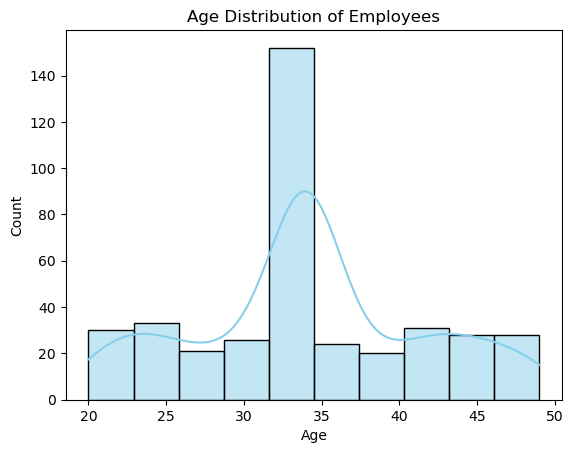

In [109]:
# Age Distribution
sns.histplot(data['Age'], bins=10, kde=True, color='skyblue')
plt.title('Age Distribution of Employees')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

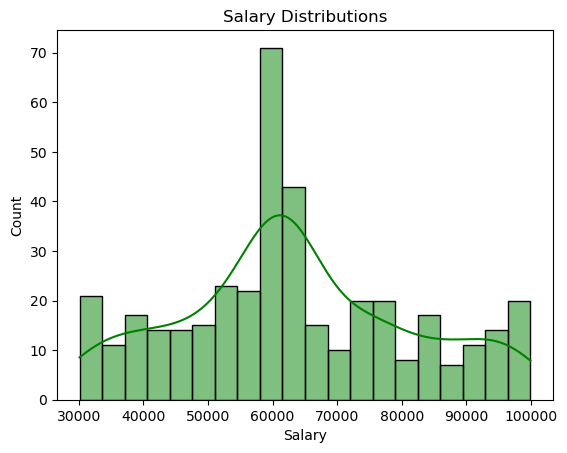

In [121]:
# Salary Distributions
sns.histplot(data['Salary'], bins=20, kde=True, color='green')
plt.title('Salary Distributions')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.show

C:\Users\dell\AppData\Local\Temp\ipykernel_17348\2258042196.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Department', order=data['Department'].value_counts().index, palette='pastel')


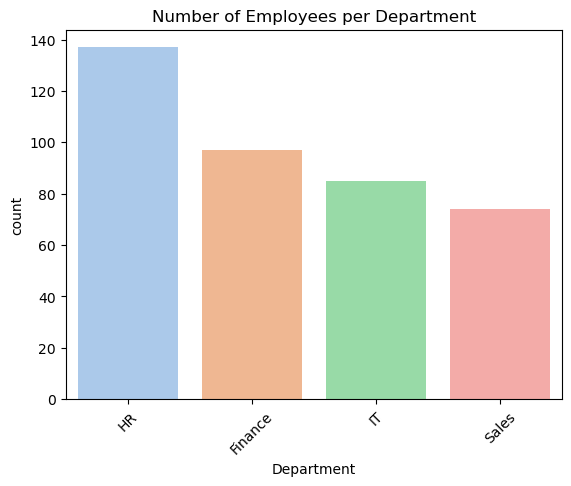

In [135]:
#  employees per Department vertical
sns.countplot(data=data, x='Department', order=data['Department'].value_counts().index, palette='pastel')
plt.title('Number of Employees per Department')
plt.xticks(rotation=45)
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_17348\290612165.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y='Department', order=data['Department'].value_counts().index, palette='pastel')


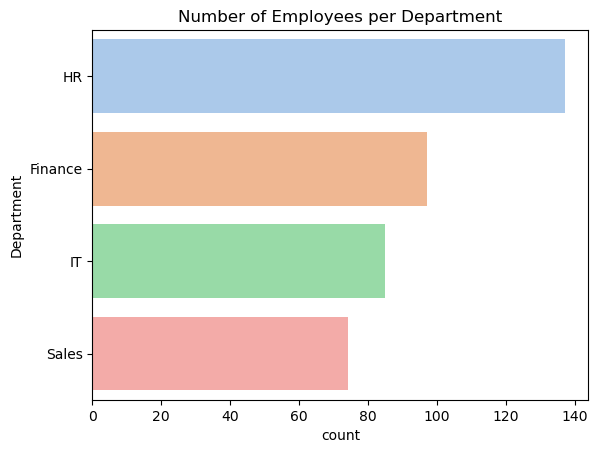

In [140]:
#  employees per Department horizonta;
sns.countplot(data=data, y='Department', order=data['Department'].value_counts().index, palette='pastel')
plt.title('Number of Employees per Department')
plt.show()

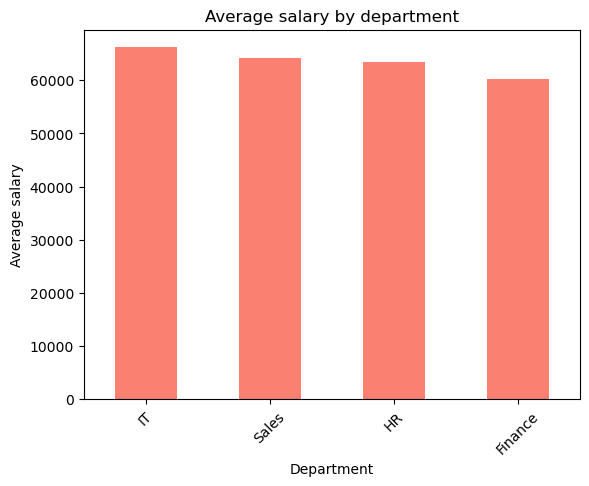

In [144]:
# Average Salary by Department
salary_by_department.plot(kind='bar', color = 'salmon')
plt.title('Average salary by department')
plt.ylabel("Average salary")
plt.xticks(rotation=45)
plt.show()

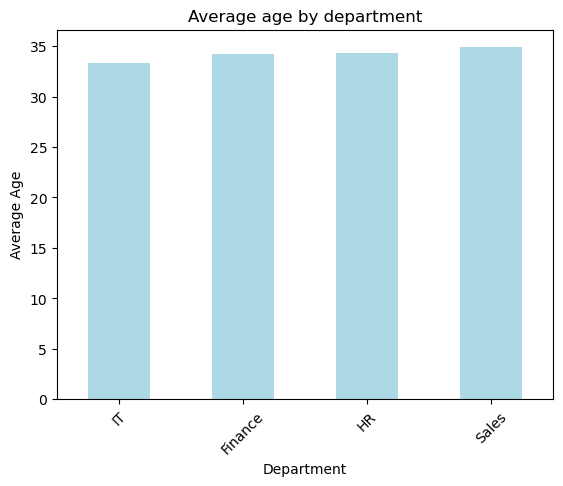

In [146]:
# Average Age by Department
age_by_department.plot(kind='bar', color = 'lightblue')
plt.title('Average age by department')
plt.ylabel("Average Age")
plt.xticks(rotation=45)
plt.show()

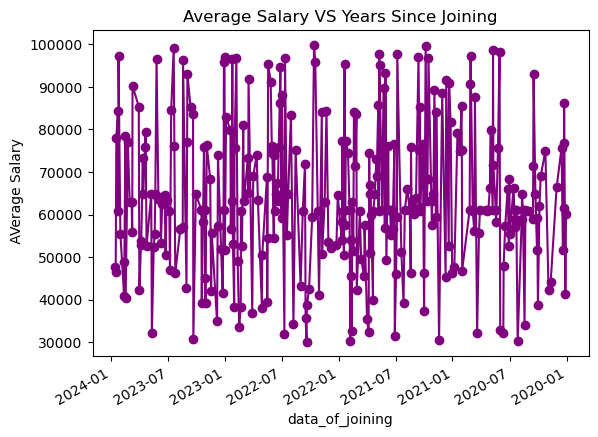

In [158]:
# Average Salary vs Years Since Joining
experince_salary.plot(kind='line',marker='o', color='purple')
plt.title('Average Salary VS Years Since Joining')
plt.xlabel('data_of_joining')
plt.ylabel(' AVerage Salary')
plt.gca().invert_xaxis()
plt.show()

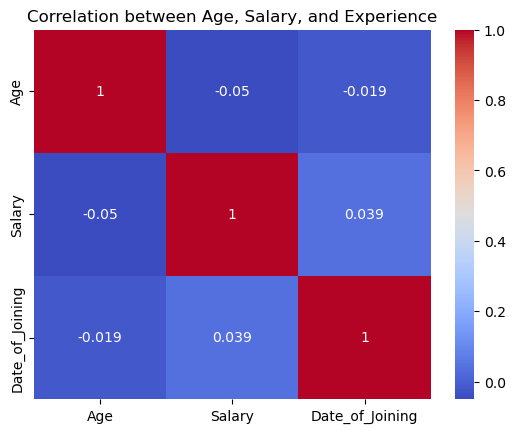

In [162]:
# Correlation Heatmap
sns.heatmap(data[['Age', 'Salary','Date_of_Joining']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Age, Salary, and Experience')
plt.show()